## CRQ 2

### Part 1

In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
#this way we can visualize in the notebook
%matplotlib inline 

In [ ]:
# We need to import both players and events 
players = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/players.json")
events = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/Secondary/events_Spain.json")
matches = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/Secondary/matches_Spain.json")

#### We are trying to extract every event we need

In [ ]:
matches[matches["label"] == "Barcelona - Real Madrid, 2 - 2"] # matchID = 2565907

In [ ]:
# events of Barcelona - Real Madrd, 2-2 on the 6th of May 2018
barc_real = events[events["matchId"] == 2565907] 

In [ ]:
# We selected only the events we are interested in, such as: Passes, Shots, Free kicks, and Duels
barc_real = barc_real[(barc_real["eventName"] == "Pass") | (barc_real["eventName"] == "Shot")| (barc_real["eventName"] == "Duel")| (barc_real["eventName"] == "Free Kick")] 

In [ ]:
findcr = barc_real.merge(players, left_on='playerId', right_on='wyId') 

In [ ]:
findcr.groupby("lastName", as_index=False).last() # at this point we found Messi and CR7

#### Let's create the footbal pitch and the heatmap for Cristiano Ronaldo 

In [ ]:
cr = barc_real[barc_real["playerId"] == 3322][["eventName", "playerId", "positions"]] #Cristiano Ronaldo
cr['start_location'] = cr.apply(lambda row: row.positions[0], axis=1)
cr['end_location'] = cr.apply(lambda row: row.positions[1], axis=1)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = patches.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = patches.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = patches.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = patches.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = patches.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = patches.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = patches.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = patches.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

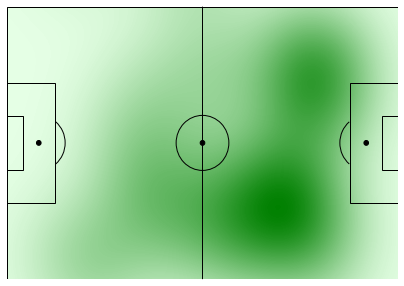

In [110]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
x_coord_cr = [x.get('x', 1) for x in cr['start_location']]
y_coord_cr = [y.get('y', 0) for y in cr["start_location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord_cr, y_coord_cr, shade = "True", color = "green", n_levels = 200)
plt.ylim(0, 80) # need this, otherwise kde plot will go outside
plt.xlim(0, 120)
plt.show()

#### Let's now create the footbal pitch and the heatmap for Messi

In [ ]:
messi = barc_real[barc_real["playerId"] == 3359][["eventName", "playerId", "positions"]] #Messi
messi['start_location'] = messi.apply(lambda row: row.positions[0], axis=1)
messi['end_location'] = messi.apply(lambda row: row.positions[1], axis=1)

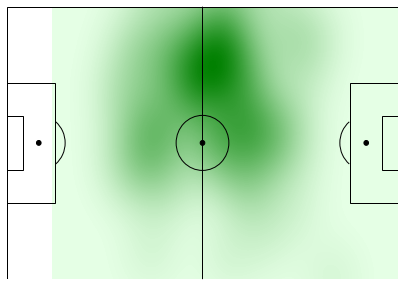

In [111]:
fig=plt.figure() #set up the figures
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
x_coord_messi = [x.get('x', 1) for x in messi['start_location']]
y_coord_messi = [y.get('y', 0) for y in messi["start_location"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord_messi, y_coord_messi, shade = "True", color = "green", n_levels = 200)
plt.ylim(0, 80) # need this, otherwise kde plot will go outside
plt.xlim(0, 120)
plt.show()

### Part 2 

In [ ]:
matches_jn = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/matches/Secondary/matches_Italy.json")
matches_jn[matches_jn["label"] == "Juventus - Napoli, 0 - 1"] # matchID = 2576295


In [ ]:
# events of Juve - Napoli, 0-1 on the 22nd of April 2018
events_italy = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/Secondary/events_Italy.json")
juv_nap = events_italy[events_italy["matchId"] == 2576295] 

In [ ]:
# We selected only the events we are interested in, such as: Passes
juv_nap = juv_nap[(juv_nap["eventName"] == "Pass")] 
juv_nap

In [ ]:
findplayers = juv_nap.merge(players, left_on='playerId', right_on='wyId') 
findplayers.groupby("lastName", as_index=False).last() 
# Pjanic ---> id = 20443
# Jorginho ---> id = 21315

### Let's create the field with arrows and heatmap

#### Pjanic

In [ ]:
pj_pass = juv_nap[juv_nap["playerId"] == 20443][["eventName", "playerId", "positions", "tags", "matchPeriod"]] #Pjanic
pj_pass['start_location'] = pj_pass.apply(lambda row: row.positions[0], axis=1)
pj_pass['end_location'] = pj_pass.apply(lambda row: row.positions[1], axis=1)
pj_pass

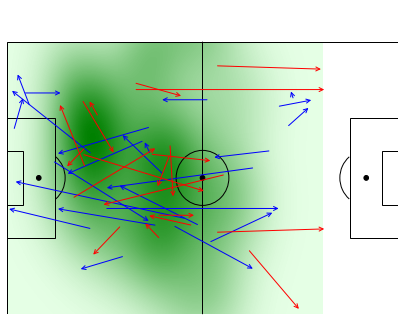

In [108]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
x_cord_pj_end = [x.get('x', 1) for x in pj_pass['end_location']]
y_cord_pj_end = [y.get('y', 0) for y in pj_pass["end_location"]]
x_coord_pj = [x.get('x', 1) for x in pj_pass['start_location']]
y_coord_pj = [y.get('y', 0) for y in pj_pass["start_location"]]
for i in range(len(pj_pass)):
    # can also differentiate by color
    c = "blue" if pj_pass.iloc[i]['matchPeriod'] == "1H" else "red"
    ax.annotate("", xy = (y_cord_pj_end[i], x_cord_pj_end[i]), xycoords = 'data',
               xytext = (y_coord_pj[i], x_coord_pj[i]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = c),)
sns.kdeplot(x_coord_pj, y_coord_pj, shade = "True", color = "green", n_levels = 200)
plt.ylim(0, 80) # need this, otherwise kde plot will go outside
plt.xlim(0, 120)
plt.show()

#### Jorginho

In [ ]:
jo_pass = juv_nap[juv_nap["playerId"] == 21315][["eventName", "playerId", "positions", "tags", "matchPeriod"]] #Jorginho
jo_pass['start_location'] = jo_pass.apply(lambda row: row.positions[0], axis=1)
jo_pass['end_location'] = jo_pass.apply(lambda row: row.positions[1], axis=1)
jo_pass

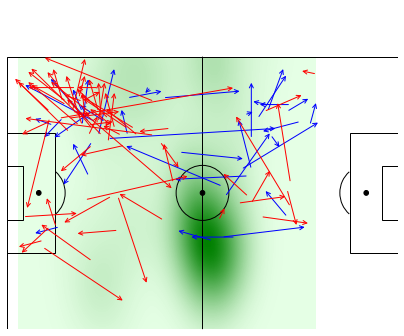

In [109]:
fig=plt.figure()
fig.set_size_inches(7, 5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.axis('off')
x_cord_jo_end = [x.get('x', 1) for x in jo_pass['end_location']]
y_cord_jo_end = [y.get('y', 0) for y in jo_pass["end_location"]]
x_coord_jo = [x.get('x', 1) for x in jo_pass['start_location']]
y_coord_jo = [y.get('y', 0) for y in jo_pass["start_location"]]
for i in range(len(jo_pass)):
    # can also differentiate by color
    c = "blue" if jo_pass.iloc[i]['matchPeriod'] == "1H" else "red"
    ax.annotate("", xy = (y_cord_jo_end[i], x_cord_jo_end[i]), xycoords = 'data',
               xytext = (y_coord_jo[i], x_coord_jo[i]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = c),)
sns.kdeplot(x_coord_jo, y_coord_jo, shade = "True", color = "green", n_levels = 200)
plt.ylim(0, 80) # need this, otherwise kde plot will go outside
plt.xlim(0, 120)
plt.show()